# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

In [6]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './data'

In [7]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ../data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

In [3]:
app_train.dtypes.value_counts()


float64    65
int64      41
object     16
dtype: int64

In [4]:
app_train.select_dtypes(include=["int64", "float64"]).apply(pd.Series.nunique, axis = 0)

SK_ID_CURR                     307511
TARGET                              2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
AMT_ANNUITY                     13672
AMT_GOODS_PRICE                  1002
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_REGISTRATION               15688
DAYS_ID_PUBLISH                  6168
OWN_CAR_AGE                        62
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
CNT_FAM_MEMBERS                    17
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT

In [6]:

dtype_select = ["int64", "float64"]

numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])


numeric_columns

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_M

In [34]:
# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])

print("Numbers of remain columns %d" % len(numeric_columns))


Numbers of remain columns 8


Numbers of remain columns 8


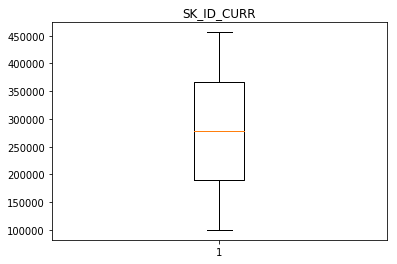

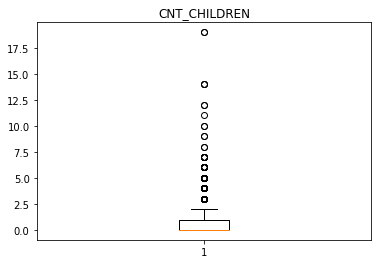

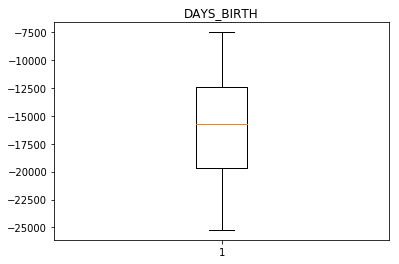

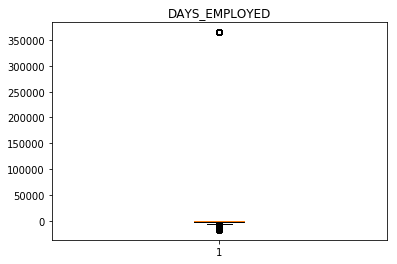

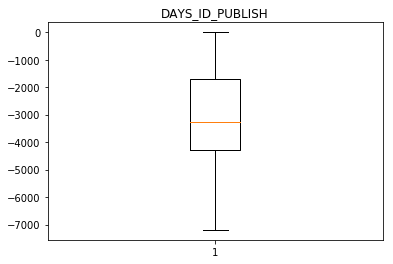

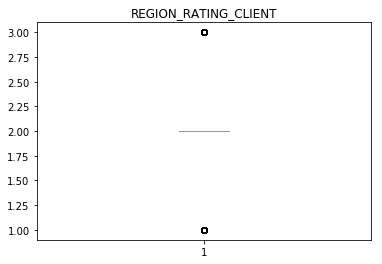

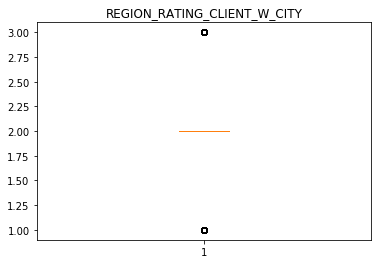

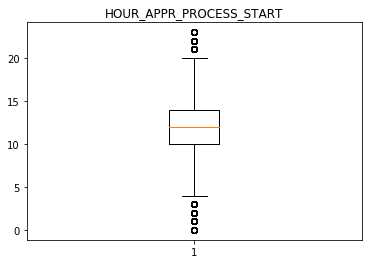

In [11]:
# 先篩選數值型的欄位
"""
YOUR CODE HERE, fill correct data types (for example str, float, int, ...)
"""

dtype_select = ["int64", "float64"]

numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])

# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns %d" % len(numeric_columns))

# 檢視這些欄位的數值範圍
for col in numeric_columns:
    """
    Your CODE HERE, make the box plot
    """
    #plt.hist(app_train[col])
    plt.boxplot(app_train[col])
    plt.title(col)
    #app_train.boxplot(col)
    plt.show()
    
#boxplot refance 
#https://wiki.mbalib.com/zh-tw/%E7%AE%B1%E7%BA%BF%E5%9B%BE
#http://estat.ncku.edu.tw/topic/graph_stat/base/BoxPlot.html

# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

1. AMT_INCOME_TOTAL
2. REGION_POPULATION_RELATIVE
3. OBS_60_CNT_SOCIAL_CIRCLE

4. OWN_CAR_AGE  
5. DAYS_LAST_PHONE_CHANGE


In [9]:
#OWN_CAR_AGE
print(app_train['OWN_CAR_AGE'].describe())
app_train['OWN_CAR_AGE'].value_counts()
#有許多小於合法擁有駕照年齡

count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64


7.0     7424
6.0     6382
3.0     6370
8.0     5887
2.0     5852
4.0     5557
1.0     5280
9.0     5020
10.0    4806
14.0    4594
13.0    4566
12.0    4257
11.0    4161
5.0     3595
15.0    3580
16.0    3355
17.0    2899
64.0    2443
18.0    2418
0.0     2134
19.0    1864
20.0    1527
21.0    1462
22.0    1250
24.0    1150
23.0    1067
65.0     891
25.0     865
26.0     580
28.0     542
        ... 
30.0     326
31.0     267
32.0     208
34.0     183
35.0     157
33.0     132
36.0     124
38.0      97
40.0      85
39.0      78
37.0      75
41.0      58
42.0      42
44.0      21
43.0      19
54.0      12
45.0      11
49.0       6
46.0       5
55.0       4
51.0       3
63.0       2
91.0       2
69.0       1
48.0       1
52.0       1
56.0       1
47.0       1
50.0       1
57.0       1
Name: OWN_CAR_AGE, Length: 62, dtype: int64

In [10]:
#DAYS_LAST_PHONE_CHANGE
print(app_train['DAYS_LAST_PHONE_CHANGE'].describe())
app_train['DAYS_LAST_PHONE_CHANGE'].value_counts()
#0.0 數值很不正常

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
-5.0         824
-6.0         537
-7.0         442
-8.0         278
-476.0       222
-352.0       213
-392.0       211
-364.0       209
-479.0       204
-329.0       203
-358.0       203
-293.0       202
-350.0       201
-399.0       200
-441.0       200
-404.0       199
-463.0       198
-9.0         198
-11.0        198
-301.0       197
-496.0       195
-362.0       195
-304.0       195
-483.0       195
-308.0       195
           ...  
-4018.0        1
-3622.0        1
-3603.0        1
-3866.0        1
-3605.0        1
-3390.0        1
-3818.0        1
-3607.0        1
-3861.0        1
-3723.0        1
-3703.0        1
-3781.0        1
-4051.0        1
-3580.0        1
-3633.0        1
-3592.0        1
-3857.0        1
-4118.0        1
-3783.0        1
-3466.0        1
-3949.0        1
-3764.0        1
-3620.0        1
-4292.0        1
-3747.0        1
-3558.0        1
-3978.0        1
-3701.0       

In [11]:
#AMT_INCOME_TOTAL
#app_train[0:10]['AMT_INCOME_TOTAL']
app_train.loc[app_train['AMT_INCOME_TOTAL'].idxmax()]
print(app_train['AMT_INCOME_TOTAL'].describe())
app_train['AMT_INCOME_TOTAL'].value_counts()
# 最大值離平均與中位數很遠

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
225000.0    20698
202500.0    16341
67500.0     11147
270000.0    10827
81000.0      6001
315000.0     5862
247500.0     5344
126000.0     4668
360000.0     4115
121500.0     3848
99000.0      3633
292500.0     3418
103500.0     3330
76500.0      3146
144000.0     3123
171000.0     2647
450000.0     2435
117000.0     2390
54000.0      2319
72000.0      2187
166500.0     2053
45000.0      2043
108000.0     1946
337500.0     1790
94500.0      1747
            ...  
100300.5        1
200794.5        1
100476.0        1
200961.0        1
200997.0        1
100507.5        1
100516.5        1
50274.0         1
201127.5        1
100566.0        1
402376.5        1
100629.0        1
201267.0        1
50323.5         1
201361.5        1
100786.5        1
201658.5        1
100854.0        1
245046.6        1
201811.5        1
403650.0        1
100944.0        1
58950.0         1
101083.5        1
404406.0  

In [12]:
home_credit_path = os.path.join(dir_data, 'HomeCredit_columns_description.csv')

print('Path of read in HomeCredit: %s' % (home_credit_path))
home_credit = pd.read_csv(home_credit_path, encoding='ISO-8859-1')
home_credit.head()

home_credit.loc[home_credit['Row'] == 'AMT_INCOME_TOTAL']

#home_credit[home_credit.apply(lambda x: x['Row'] =="SK_ID_CURR", axis=1)]


Path of read in HomeCredit: ../data/HomeCredit_columns_description.csv


,Unnamed: 0,Table,Row,Description,Special
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN


In [8]:
def ecdf(data):
    return np.cumsum(data.value_counts().sort_index())

In [25]:
def ecdf2(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: y
    y = np.sort(data)
    # y-data for the ECDF: x
    x = np.arange(1, n+1) / n
    #return x, y
    return pd.Series(x,y)

In [32]:
from statsmodels.distributions.empirical_distribution import ECDF
def ecdf3(data):
    return ECDF(data)

#plt.plot(cdf.x, cdf.y/cdf.y.max())

In [33]:
#print(app_train.AMT_INCOME_TOTAL.value_counts(ascending=True))

#print(app_train.AMT_INCOME_TOTAL.value_counts().sort_index().cumsum())

#type(ecdf2(app_train['AMT_INCOME_TOTAL']))

### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


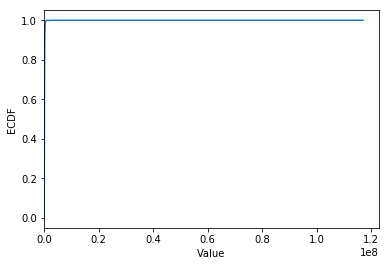

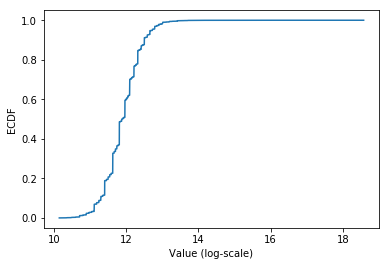

In [34]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
YOUR CODE HERE
"""

cdf = ecdf(app_train['AMT_INCOME_TOTAL'])



plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()


## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


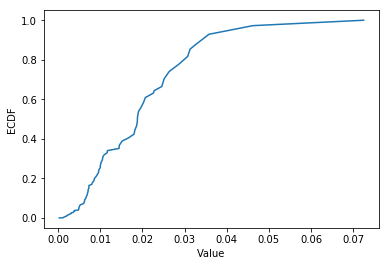

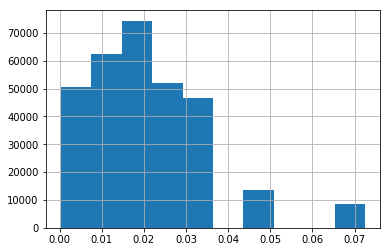

0.035792    16408
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11601
0.031329    11321
0.028663    11157
0.019101     8694
0.072508     8412
0.020713     8066
0.018850     7668
0.020246     7178
0.018634     7038
0.022625     6943
0.015221     6824
0.032561     6636
0.024610     6404
0.019689     6172
0.018029     6167
0.018801     6108
0.018209     6052
0.014520     4785
0.016612     4408
0.007020     4105
0.022800     3807
0.010032     3570
0.010006     3563
0.014464     3422
0.004960     3300
0.011703     3252
            ...  
0.006008     1796
0.003069     1783
0.008575     1763
0.008474     1740
0.007274     1724
0.007114     1684
0.006305     1672
0.008068     1668
0.008866     1654
0.006671     1653
0.002042     1642
0.003813     1616
0.005084     1482
0.006296     1225
0.005313     1218
0.003818     1212
0.003122     1147
0.006233     1087
0.005002     1068
0.002134     1051
0.004849     1038
0.005144      967
0.002506      944
0.003541      627
0.001276  

In [32]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
cdf = ecdf(app_train['REGION_POPULATION_RELATIVE'])


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


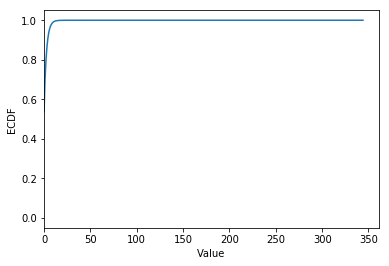

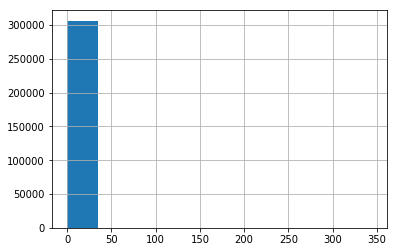

344.0         1
47.0          1
30.0          1
29.0          2
28.0          1
27.0          5
26.0          1
25.0         11
24.0         12
23.0         13
22.0         20
21.0         28
20.0         30
19.0         44
18.0         49
17.0         73
16.0        137
15.0        166
14.0        238
13.0        401
12.0        620
11.0        837
10.0       1335
9.0        1959
8.0        2886
7.0        4344
6.0        6349
5.0        9463
4.0       13946
3.0       20215
2.0       29766
1.0       48870
0.0      164666
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


In [33]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here

cdf = ecdf(app_train['OBS_60_CNT_SOCIAL_CIRCLE'])


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()
"""

cdf = ecdf(app_train['OBS_60_CNT_SOCIAL_CIRCLE'])


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()
app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

In [16]:

print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())
app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


0.0      164666
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4344
8.0        2886
9.0        1959
10.0       1335
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
27.0          5
29.0          2
28.0          1
344.0         1
47.0          1
26.0          1
30.0          1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

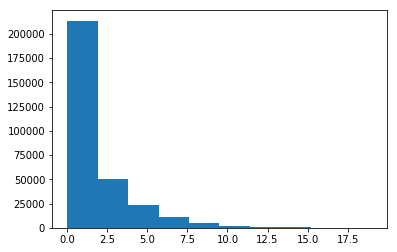

In [17]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
"""
Your Code Here
"""
sub_taran = app_train.loc[app_train['OBS_60_CNT_SOCIAL_CIRCLE'] < 20]

#loc_a = 
#loc_b = 

#app_train.loc[loc_a, loc_b].hist()
plt.show()

plt.hist(sub_taran['OBS_60_CNT_SOCIAL_CIRCLE'])
plt.show()
